In [1]:
# %load EPL_Analysis.py
"""
Zain Kazi
Premiere league Transfer Analysis
"""
#%% Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%% Read in data
df_transfer = pd.read_excel('C:/Users/zaink/Documents/Python Scripts/PremiereLeagueData.xlsx')
df_transfer.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Arsenal FC,Thomas,27.0,Defensive Midfield,Atlético Madrid,£45.00m,in,Summer,45.0,Premier League,2020,2020/2021
1,Arsenal FC,Gabriel,22.0,Centre-Back,LOSC Lille,£23.40m,in,Summer,23.4,Premier League,2020,2020/2021
2,Arsenal FC,Pablo Marí,26.0,Centre-Back,Flamengo,£7.20m,in,Summer,7.2,Premier League,2020,2020/2021
3,Arsenal FC,Rúnar Alex Rúnarsson,25.0,Goalkeeper,Dijon,£1.80m,in,Summer,1.8,Premier League,2020,2020/2021
4,Arsenal FC,Cédric Soares,28.0,Right-Back,Southampton,Free transfer,in,Summer,0.0,Premier League,2020,2020/2021


In [3]:
# Clean transfer data
df_transfer = df_transfer[df_transfer['year'] > 2009]
df_transfer['permanent'] = (df_transfer['fee'].str[0] == "£") | (df_transfer['fee'] == 'Free transfer')
df_permanent = df_transfer[df_transfer['permanent'] == True]

# Money spent and brought in by season
df_season = df_permanent.groupby(['season','transfer_movement'], as_index=False)['fee_cleaned'].sum()
df_year = df_transfer.groupby(['year','transfer_movement'], as_index=False)['fee_cleaned'].sum()
df_in = df_season[df_season['transfer_movement'] == 'in'].rename(columns = {"fee_cleaned":'Amount Spent'})
df_in['spent_negative'] = -df_in['Amount Spent']
df_out = df_season[df_season['transfer_movement'] == 'out'].rename(columns = {'fee_cleaned':'Amount Brought In'})
df_net = pd.merge(df_in,df_out, on = 'season').drop(columns = ['transfer_movement_x','transfer_movement_y'])
df_net['spent_negative'] = -df_net['Amount Spent']
df_net['Net Spending'] = df_net['Amount Brought In'] - df_net['Amount Spent']
df_net['spending_ratio'] = df_net['Amount Spent']/df_net['Amount Brought In']

# Money spent by team by season
df_team = df_permanent.groupby(['club_name','season','transfer_movement'], as_index=False)['fee_cleaned'].sum()
df_team = df_team.pivot(index='club_name', columns=['transfer_movement','season']).stack(level='season')
df_team = df_team.reset_index(level = ['club_name','season'])
df_team.columns = df_team.columns.droplevel()
df_team.columns = ['Club Name', 'Season','Amount Spent','Amount Brought In']
df_team = df_team.fillna(0)
df_team['Net Spending'] = df_team['Amount Brought In'] - df_team['Amount Spent']


# Spending of Top 6
Top6 = ['Arsenal FC','Chelsea FC','Liverpool FC','Manchester City','Manchester United','Tottenham Hotspur']

# Money spent and brought in by season
df_season_top = df_permanent[df_permanent['club_name'].isin(Top6)] .groupby(['season','transfer_movement'], as_index=False)['fee_cleaned'].sum()
df_top_in = df_season_top[df_season['transfer_movement'] == 'in'].rename(columns = {"fee_cleaned":'fee_in'})
df_top_out = df_season_top[df_season['transfer_movement'] == 'out'].rename(columns = {'fee_cleaned':'fee_out'})
df_top6 = pd.merge(df_top_in,df_top_out, on = 'season').drop(columns = ['transfer_movement_x','transfer_movement_y'])
df_top6['spent_negative'] = -df_top6['fee_in']
df_top6['net_spent'] = df_top6['fee_out'] - df_top6['fee_in']
df_top6['spending_ratio'] = df_top6['fee_in']/df_top6['fee_out']
df_net['Top6_Spent'] = df_top6['net_spent'] / df_net['Net Spending']

In [4]:
#%% Player Rating Data

# Read in player ratings
df_ratings = pd.read_csv('C:/Users/zaink/Documents/Python Scripts/WhoScoredFinal1.csv', low_memory = False)
df_ratings.head(10)

,ranking,seasonId,seasonName,tournamentId,tournamentRegionId,tournamentRegionCode,tournamentRegionName,regionCode,tournamentName,tournamentShortName,...,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,assist
0,1,4246,2016,124,247,cint,International,gb-wls,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4246,2016,124,247,cint,International,fr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4246,2016,124,247,cint,International,hr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4246,2016,124,247,cint,International,be,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4246,2016,124,247,cint,International,de,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,4246,2016,124,247,cint,International,al,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,4246,2016,124,247,cint,International,hr,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,4246,2016,124,247,cint,International,gb-wls,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,4246,2016,124,247,cint,International,ch,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,4246,2016,124,247,cint,International,es,European Championship,UEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Filter by EPL after 2010 
seasons = []
for i in range(2010,2020):
    season = str(i) +'/'+ str(i+1)
    seasons.append(season)   
df_ratings = df_ratings[(df_ratings['seasonName'].isin(seasons)) & (df_ratings['tournamentShortName'] == 'EPL')]
df_ratings['player_name'] = df_ratings['name']
df_ratings['club_name'] = df_ratings['teamName']

# Group by player ratings for each team
df_ratings_avg = df_ratings.groupby(['player_name','club_name'], as_index=False)['rating'].mean()
df_ratings_avg.head(10)

,player_name,club_name,rating
0,Aaron Connolly,Brighton,6.346471
1,Aaron Cresswell,West Ham,6.683149
2,Aaron Hughes,Fulham,6.878847
3,Aaron Lennon,Burnley,6.280379
4,Aaron Lennon,Everton,6.599704
5,Aaron Lennon,Tottenham,6.809258
6,Aaron McLean,Hull,6.140000
7,Aaron Mooy,Brighton,6.765455
8,Aaron Mooy,Huddersfield,6.797696
9,Aaron Ramsdale,Bournemouth,6.773214


In [6]:
# Find inconsistencies in team naming convention prior to merging
ratingTeams = np.sort(df_ratings_avg['club_name'].unique())
transferTeams = np.sort(df_permanent['club_name'].unique())
transferTeams = np.delete(transferTeams,np.where(transferTeams == 'Leeds United'))
teamNames = pd.DataFrame({'rating':ratingTeams,'transfer':transferTeams})

# Define function to change team names in ratings data to match team names in player data
def replaceTeamName(original, replacement):
    df_ratings_avg['club_name'] = np.where(df_ratings_avg['club_name'] == original,replacement, df_ratings_avg['club_name'])

# Change teams to create consistency in ratings and transfer data
replaceTeamName('Arsenal','Arsenal FC')
replaceTeamName('Birmingham','Birmingham City')
replaceTeamName('Blackburn','Blackburn Rovers')
replaceTeamName('Blackpool','Blackpool FC')
replaceTeamName('Bolton','Bolton Wanderers')
replaceTeamName('Bournemouth','AFC Bournemouth')
replaceTeamName('Brighton','Brighton & Hove Albion')
replaceTeamName('Burnley','Burnley FC')
replaceTeamName('Cardiff','Cardiff City')
replaceTeamName('Chelsea','Chelsea FC')
replaceTeamName('Everton','Everton FC')
replaceTeamName('Fulham','Fulham FC')
replaceTeamName('Huddersfield','Huddersfield Town')
replaceTeamName('Hull','Hull City')
replaceTeamName('Leicester','Leicester City')
replaceTeamName('Liverpool','Liverpool FC')
replaceTeamName('Middlesbrough','Middlesbrough FC')
replaceTeamName('Norwich','Norwich City')
replaceTeamName('Southampton','Southhampton FC')
replaceTeamName('Stoke','Stoke City')
replaceTeamName('Sunderland','Sunderland AFC')
replaceTeamName('Swansea','Swansea City')
replaceTeamName('Reading','Reading FC')
replaceTeamName('Tottenham','Tottenham Hotspur')
replaceTeamName('Watford','Watford FC')
replaceTeamName('West Ham','West Ham United')
replaceTeamName('Wigan','Wigan Athletic')

In [7]:
# Merge ratings and transfer data
df_merge = pd.merge(df_ratings_avg, df_permanent, on = ['player_name','club_name'], how = 'inner')
df_merge.head()
df_merge_in = df_merge[df_merge['transfer_movement'] == 'in']
df_merge_in['Top 6'] = df_merge_in['club_name'].isin(Top6)
df_merge_in['standard_fee'] = df_merge_in['fee_cleaned']
df_merge_in['Rating to Fee'] = df_merge_in['rating']/df_merge_in['fee_cleaned']
df_merge_in.head()

<ipython-input-7-06db2576f1eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_in['Top 6'] = df_merge_in['club_name'].isin(Top6)
<ipython-input-7-06db2576f1eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_in['standard_fee'] = df_merge_in['fee_cleaned']
<ipython-input-7-06db2576f1eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,player_name,club_name,rating,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,permanent,Top 6,standard_fee,Rating to Fee
0,Aaron Cresswell,West Ham United,6.683149,24.0,Left-Back,Ipswich,£4.28m,in,Summer,4.28,Premier League,2014,2014/2015,True,False,4.28,1.561483
2,Aaron Lennon,Burnley FC,6.280379,30.0,Right Winger,Everton,£1.53m,in,Winter,1.53,Premier League,2017,2017/2018,True,False,1.53,4.104823
4,Aaron Lennon,Everton FC,6.599704,28.0,Right Winger,Spurs,£5.40m,in,Summer,5.40,Premier League,2015,2015/2016,True,False,5.40,1.222167
7,Aaron Mooy,Brighton & Hove Albion,6.765455,29.0,Central Midfield,Huddersfield,£2.97m,in,Winter,2.97,Premier League,2019,2019/2020,True,False,2.97,2.277931
8,Aaron Mooy,Huddersfield Town,6.797696,26.0,Central Midfield,Man City,£8.19m,in,Summer,8.19,Premier League,2017,2017/2018,True,False,8.19,0.830000


C:\Users\zaink\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Spending Distribution')

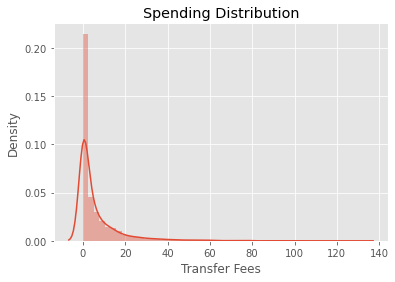

In [10]:
# Spending distribution
plt.style.use('ggplot')
sns.color_palette("mako")
sns.distplot(df_permanent['fee_cleaned'], kde = True)
plt.xlabel('Transfer Fees')
plt.title('Spending Distribution')

Text(0.5, 1.0, 'Transfer Activity in 2010s')

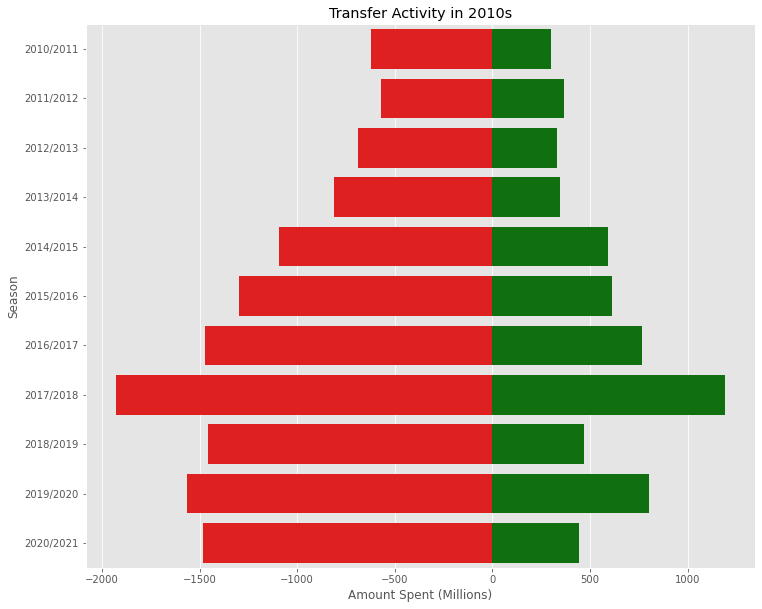

In [13]:
# Graph seasonal spending
plt.figure(figsize=(12,10))
sns.barplot(x = 'spent_negative', y = 'season', data = df_net, color = 'red', orient = 'h', ci = None)
sns.barplot(x = 'Amount Brought In', y = 'season', data = df_net, color = 'green', orient = 'h', ci = None)
plt.ylabel('Season')
plt.xlabel('Amount Spent vs. Brought In (Millions)')
plt.title('Transfer Activity in 2010s')

Text(0.5, 1.0, 'Transfer Activity in 2010s')

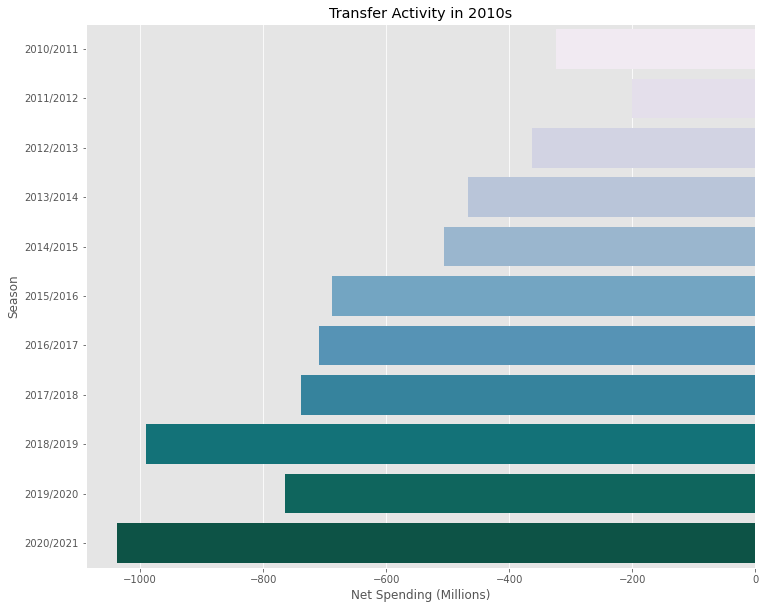

In [14]:
# Graph seasonal spending
plt.figure(figsize=(12,10))
sns.barplot(x = 'Net Spending', y = 'season', data = df_net, palette='PuBuGn', orient = 'h', ci = None)
plt.ylabel('Season')
plt.xlabel('Net Spending (Millions)')
plt.title('Transfer Activity in 2010s')

Text(0.5, 1.0, 'Ratio of British Pounds Spent vs. Brought in 2010s')

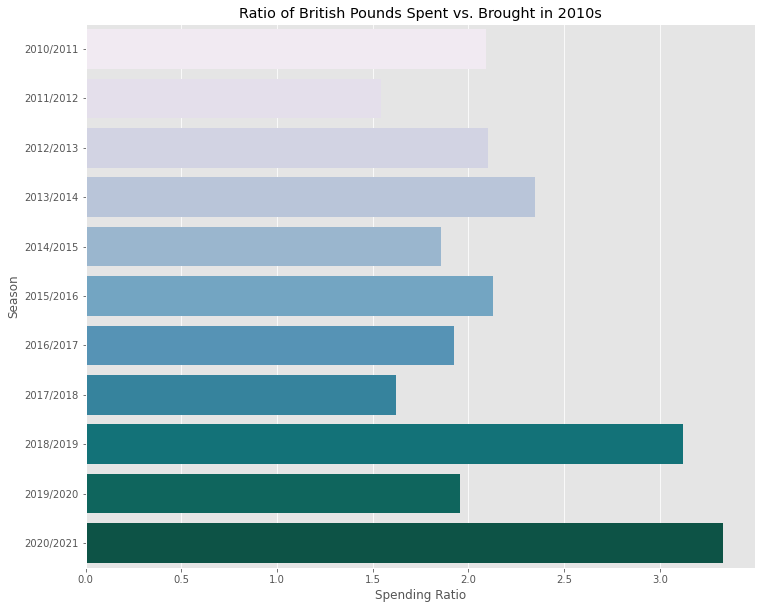

In [15]:
# Graph seasonal spending
plt.figure(figsize=(12,10))
sns.barplot(x = 'spending_ratio', y = 'season', data = df_net, palette='PuBuGn', orient = 'h', ci = None)
plt.ylabel('Season')
plt.xlabel('Spending Ratio')
plt.title('Ratio of British Pounds Spent vs. Brought in 2010s')

<Figure size 432x288 with 0 Axes>

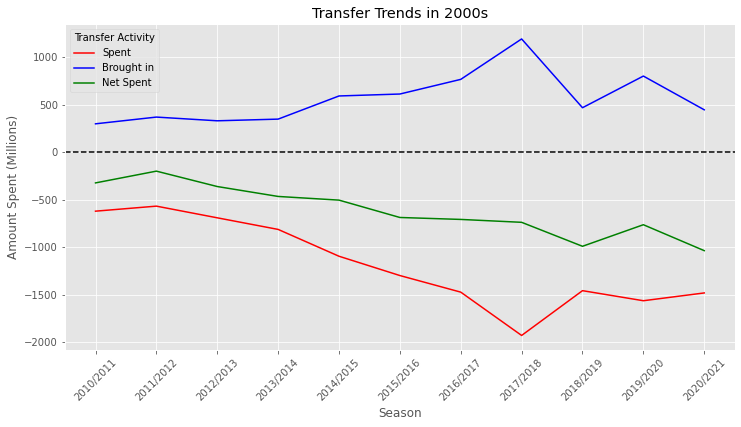

<Figure size 432x288 with 0 Axes>

In [17]:
# Graph spending trends 
plt.figure(figsize=(12,6))
sns.lineplot(x = 'season', y = 'spent_negative', data = df_in, color = 'red', ci = None)
sns.lineplot(x = 'season', y = 'Amount Brought In', data = df_out, color = 'blue', ci = None)
sns.lineplot(x = 'season', y = 'Net Spending', data = df_net, color = 'green', ci = None)
plt.axhline(0, 0, linestyle = '--', color = 'black')
plt.ylabel('Amount Spent (Millions)')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.title('Transfer Trends in 2000s')
plt.legend(title='Transfer Activity', loc='upper left', labels=['Spent', 'Brought in', 'Net Spent'])
plt.figure()

<Figure size 432x288 with 0 Axes>

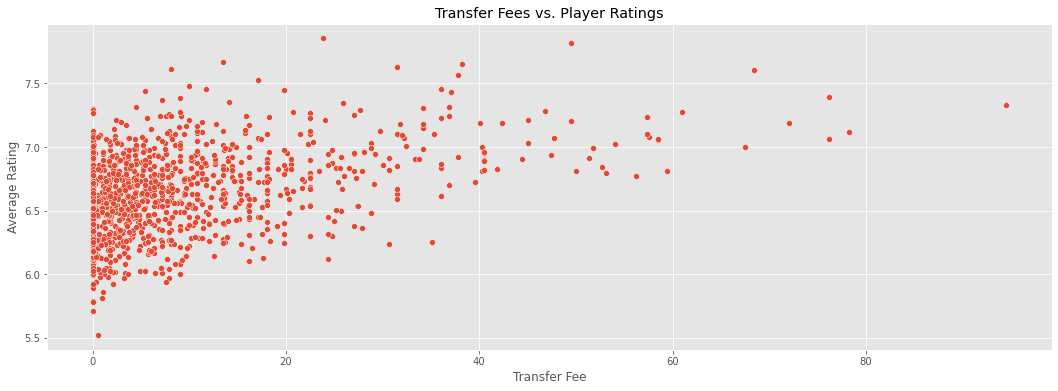

<Figure size 432x288 with 0 Axes>

In [18]:
# Scatter of Spending vs Ratings
plt.figure(figsize=(18,6))
sns.scatterplot(x = 'fee_cleaned', y = 'rating', data = df_merge_in)
plt.xlabel('Transfer Fee')
plt.ylabel('Average Rating')
plt.title('Transfer Fees vs. Player Ratings')
plt.figure()

<Figure size 432x288 with 0 Axes>

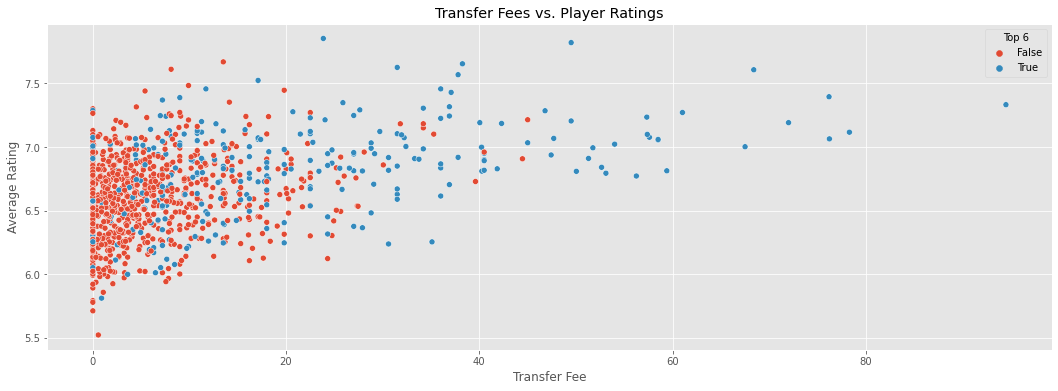

<Figure size 432x288 with 0 Axes>

In [19]:
# Scatter of Spending vs Ratings
plt.figure(figsize=(18,6))
sns.scatterplot(x = 'fee_cleaned', y = 'rating', data = df_merge_in, hue = 'Top 6')
plt.xlabel('Transfer Fee')
plt.ylabel('Average Rating')
plt.title('Transfer Fees vs. Player Ratings')
plt.figure()

<Figure size 432x288 with 0 Axes>

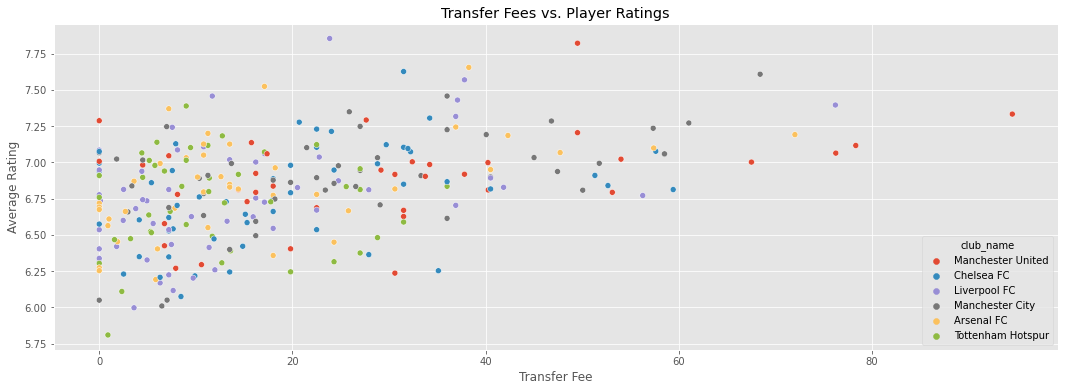

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Top 6 Spending Percentage by Season')

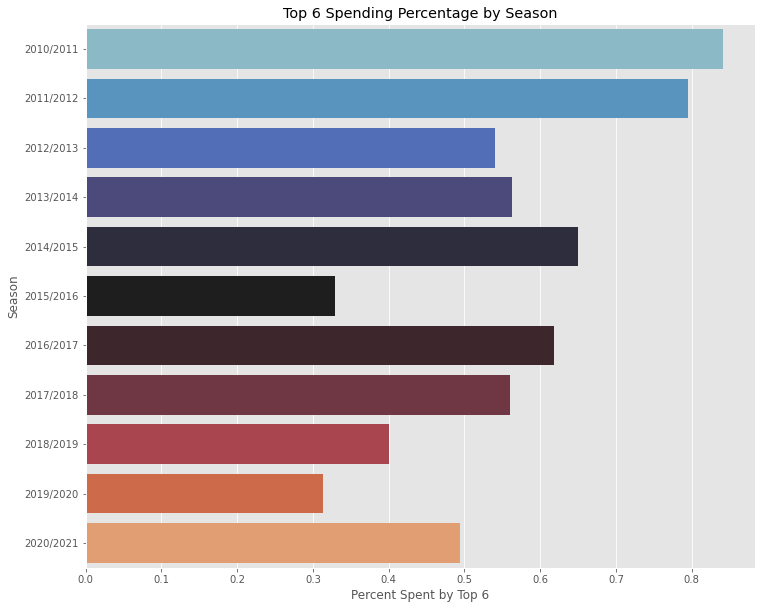

In [21]:
# Top 6 vs. Others
df_net['Top6_Spent'] = df_top6['net_spent'] / df_net['Net Spending']
plt.figure(figsize=(12,10))
sns.barplot(x = 'Top6_Spent', y = 'season', data = df_net, palette='icefire', orient = 'h', ci = None)
plt.ylabel('Season')
plt.xlabel('Percent Spent by Top 6')
plt.title('Top 6 Spending Proportion by Season')